In [1]:
import numpy as np
from sklearn import datasets
import pandas as pd
import tree_maps
from importlib import reload
import seaborn as sns
from PIL import ImageFont
from pycountry import countries

## Basic Use Case: the Iris Dataset

In [2]:
iris_raw_data = datasets.load_iris()
X, Y = (iris_raw_data.data, iris_raw_data.target)
iris_data = pd.DataFrame(X)
new_column_names = [name.replace(" (cm)", "").replace(" ", "_") for name in iris_raw_data["feature_names"]]
iris_data.columns = new_column_names
species_names = iris_raw_data["target_names"]
iris_target = np.vectorize({i:species for i,species in zip(range(3), species_names)}.get)(Y)
iris_data["target"] = iris_target
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Category [iris] of size 150
	Category [setosa] of size 50
	Category [versicolor] of size 50
	Category [virginica] of size 50


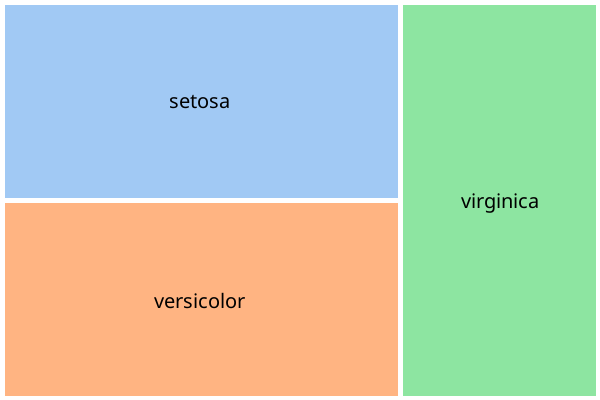

In [220]:
reload(tree_maps)
iris = tree_maps.Category(name="iris", data=iris_data, is_root=True)
iris.generate_subcategories(group_by = "target")
iris.describe()

pil_font = ImageFont.FreeTypeFont("NotoSans-Regular.ttf", size=20)
configs = tree_maps.VisConfig(600, 400,
                              proportion_cutoff=0.1, line_width=5,
                              n_categories=3,
                              styles=["palette"],
                              line_color="white",
                              legend = False)
iris.visualize(configs)

## Multi-Leveled Use Case: UK Exports in 2022

In [251]:
# data retrieved from https://www.ons.gov.uk/datasets/trade
uk_trade = pd.read_csv("uk_data.csv")
uk_trade = (uk_trade.groupby(["StandardIndustrialTradeClassification", "countries-and-territories"])
            .sum(numeric_only=True)
            .drop("sitc", axis=1)
            .reset_index()
            .rename(columns = {"StandardIndustrialTradeClassification":"sector",
                               "countries-and-territories":"country",  # why dashes instead of underlines
                               "v4_0":"trade_volume"})) # ok what are those names
uk_trade.sector = uk_trade.sector.apply(lambda sector: sector[3:])
uk_trade.country = uk_trade.country.apply(lambda abbr: countries.get(alpha_2=abbr).name)
uk_trade.head()

,sector,country,trade_volume
0,Food & live animals,Austria,36.38
1,Food & live animals,Belgium,559.24
2,Food & live animals,Bulgaria,11.88
3,Food & live animals,Cyprus,39.50
4,Food & live animals,Czechia,72.93


In [253]:
reload(tree_maps)
palette = list(sns.color_palette("pastel", 10).as_hex())
uk_cat = tree_maps.Category(name="Export", value_name="trade_volume", data = uk_trade, is_root=True)
uk_cat.generate_subcategories(group_by = ["sector", "country"])
uk_cat.describe(depth=1)

Category [Export] of size 193697.89
	Category [Animal & vegetable oils & fats] of size 688.0
	Category [Beverages & tobacco] of size 3174.01
	Category [Chemicals] of size 33539.05
	Category [Crude materials] of size 4097.93
	Category [Food & live animals] of size 10258.03
	Category [Fuels] of size 41838.98
	Category [Machinery & transport equipment] of size 59346.98
	Category [Material manufactures] of size 20306.95
	Category [Miscellaneous manufactures] of size 18789.97
	Category [Unspecified goods] of size 1657.99


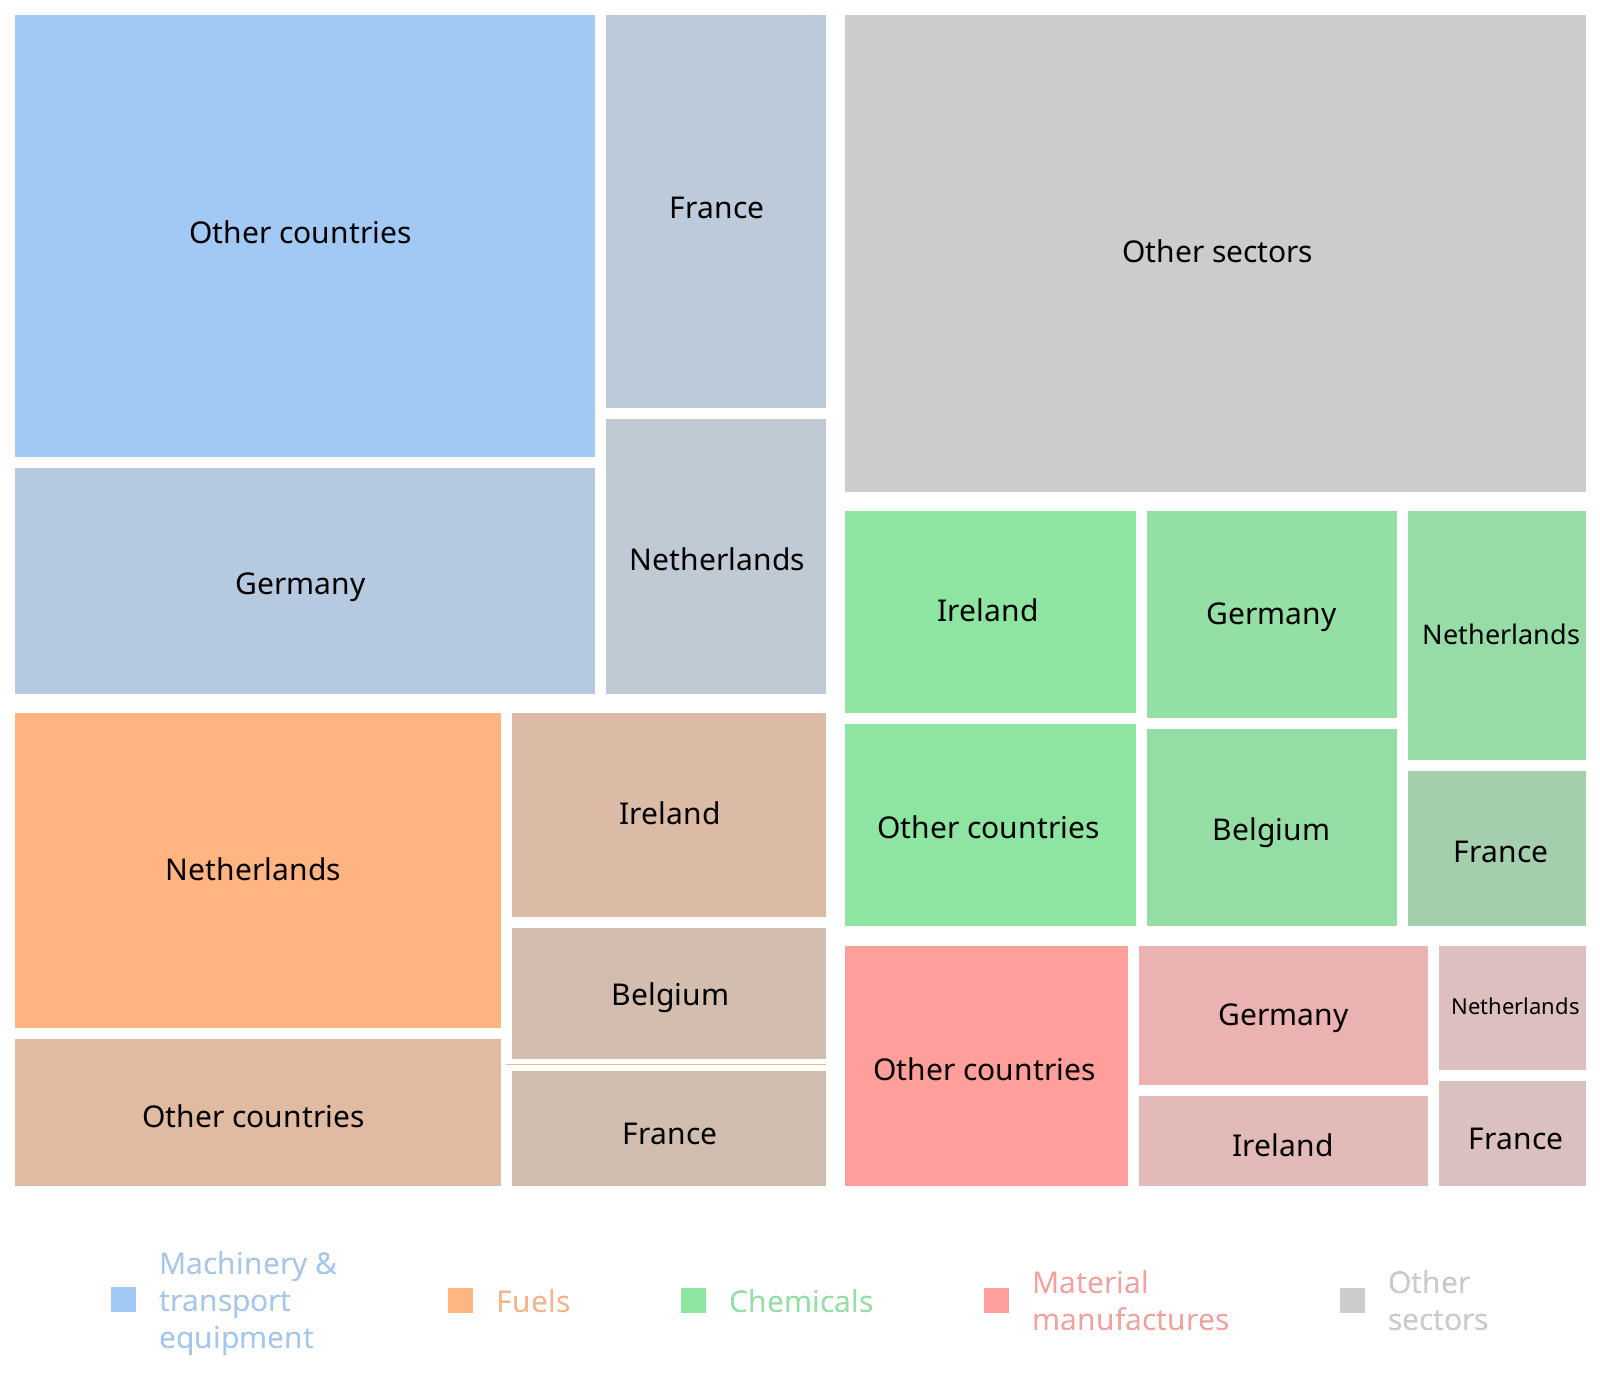

In [254]:
configs = tree_maps.VisConfig(1600, 1200,
                              base_font_size = 30,
                              proportion_cutoff=0.1, line_width=15,
                              n_categories=10,
                              line_color="white",
                              palette = palette,
                              styles=["palette", "gradient"],
                              legend_position= "bottom",
                              label_generator = lambda label: label.split(" -> ")[-1],
                              legend_rowcol_size = 200,
                              legend_rowcol_length = 5,
                              legend_rowcol_margin = 0)
uk_cat.visualize(configs)

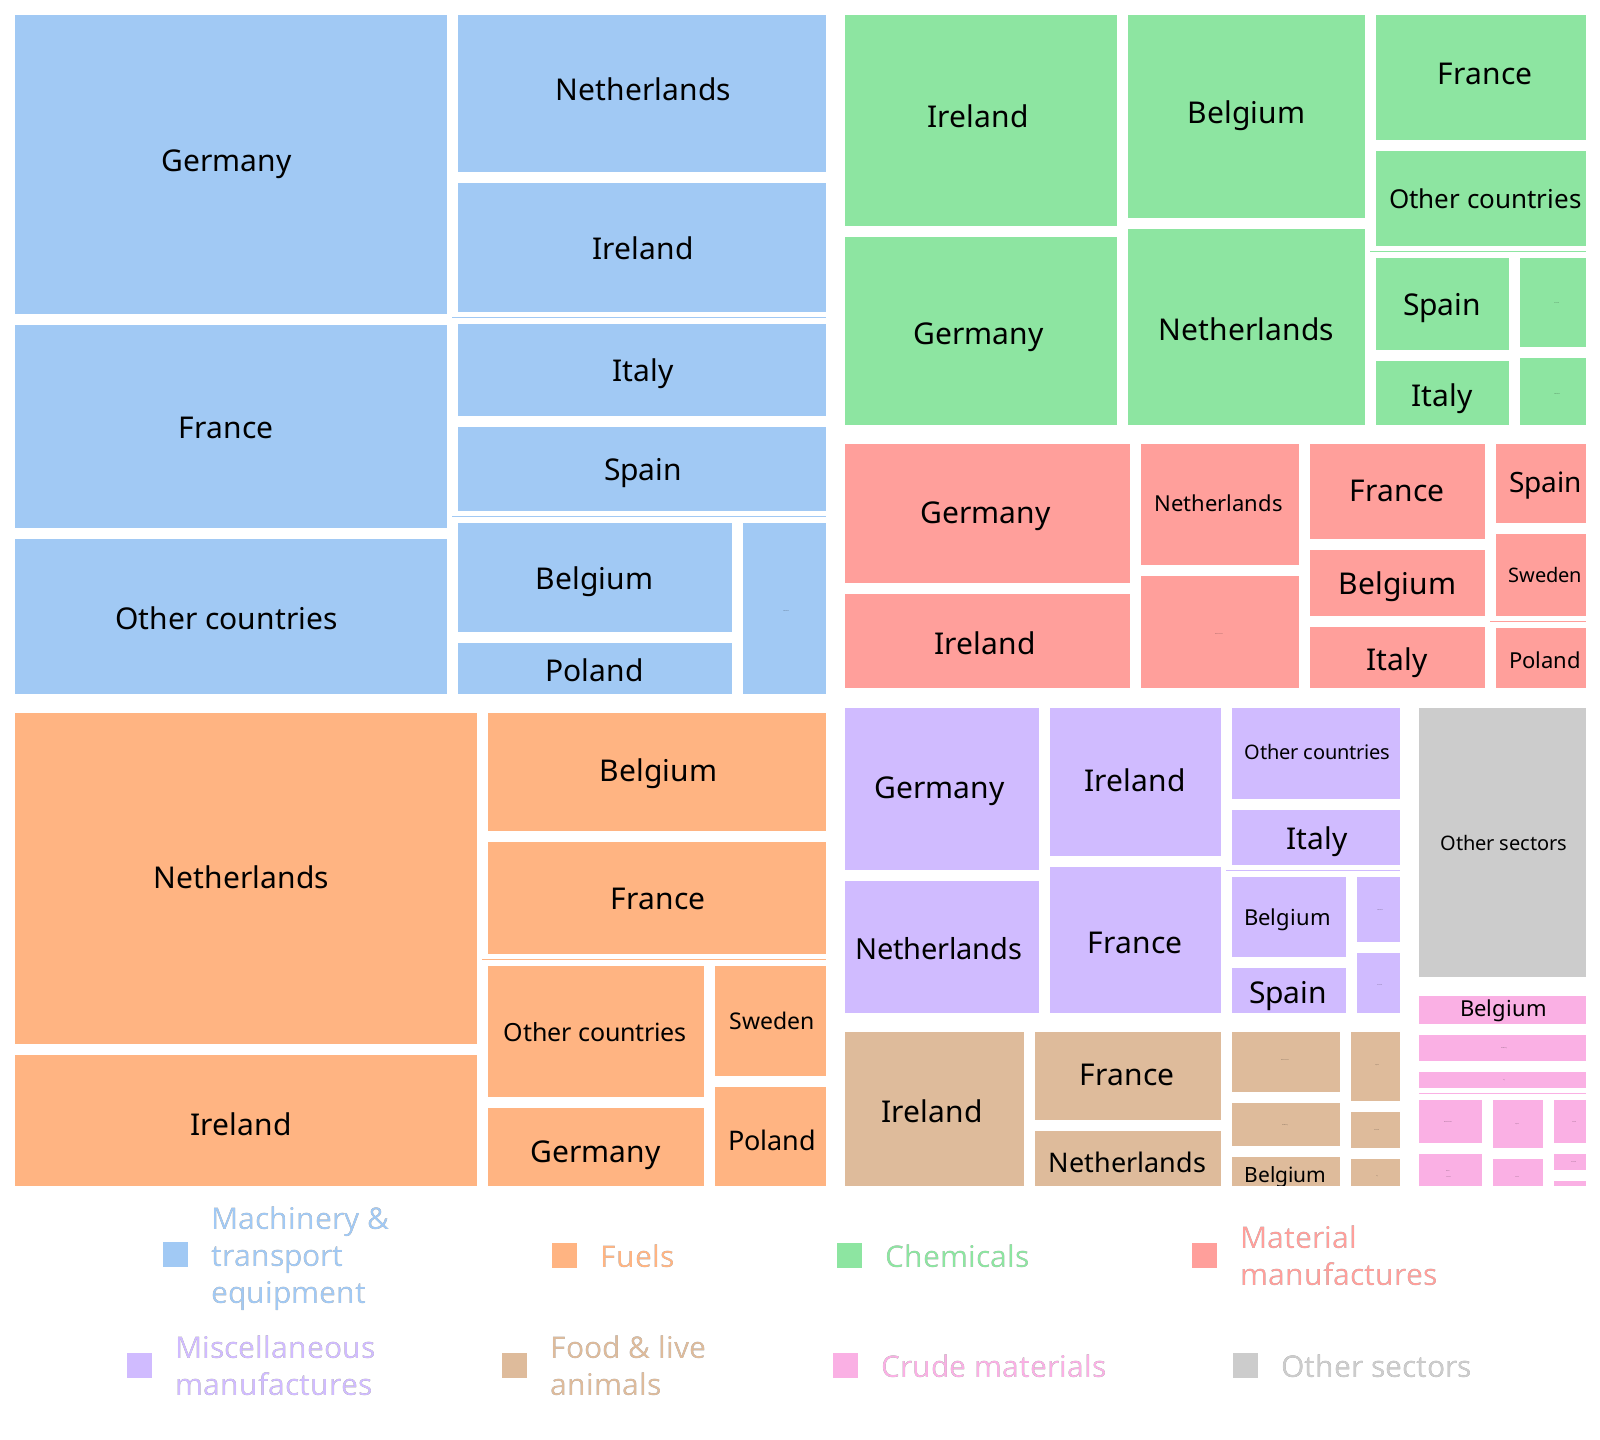

In [255]:
configs2 = tree_maps.VisConfig(1600, 1200,
                              base_font_size = 30,
                              proportion_cutoff=0.02, line_width=15,
                              n_categories=10,
                              line_color="white",
                              palette = palette,
                              styles=["palette", "uniform"],
                              legend_position= "bottom",
                              label_generator = lambda label: label.split(" -> ")[-1],
                              legend_rowcol_size = 150,
                              legend_rowcol_length = 4,
                              legend_rowcol_margin = -20,
                              min_font_size = 20)
uk_cat.visualize(configs2)